# PLAN

- [x] Acquisition
    - [x] read the csv into a dataframe
- [ ] Preparation
    - [ ] no missing values
    - [x] drop columns that are not needed
    - [x] change case to lower case
    - [x] make sure everything has right dtype
    - [ ] normalize what needs to be normalized
    - [x] rename columns for clarification
- [ ] Exploration
    - [ ] answer ALL questions raised
        - [x] Which locations are the most frequent sites of SSO?
        - [x] Which location have the most volume of overflow?
        - [x] What are most common root causes of SSO?
        - [x] Where do the majority of overflow go?

    - [ ] visualize important findings
    - [ ] decide what TODO items to keep
- [ ] Modeling
    - [ ] predict 
- [ ] Delivery
    - [ ] report
    - [ ] prezi slides
    - [ ] website

# ENVIRONMENT

In [1]:
import os
import acquire_sso as acquire
import prepare_sso as prepare
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime
from pylab import rcParams

# to explode the DataFrames and avoid truncation
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

from fbprophet import Prophet

# ACQUIRE

#### _Let's read in the data from the csv file and take a peek at te first five records._

In [2]:
df = acquire.read_data('saws-sso.csv')

In [3]:
df.head()

SSO_ID   INSPKEY  SERVNO REPORTDATE  SPILL_ADDRESS     SPILL_ST_NAME  TOTAL_GAL  GALSRET     GAL           SPILL_START            SPILL_STOP       HRS       CAUSE                                           COMMENTS       ACTIONS     WATERSHED UNITID UNITID2 DISCHARGE_TO DISCHARGE_ROUTE  COUNCIL_DISTRICT FERGUSON  Month  Year  Week  EARZ_ZONE Expr1029  PIPEDIAM  PIPELEN PIPETYPE  INSTYEAR  DWNDPTH  UPSDPTH  Inches_No  RainFall_Less3          SPILL ADDRESS SewerAssetExp  NUM_SPILLS_COMPKEY  NUM_SPILLS_24MOS PREVSPILL_24MOS UNITTYPE   ASSETTYPE LASTCLND ResponseTime ResponseDTTM  Public Notice  TIMEINT Root_Cause STEPS_TO_PREVENT     SPILL_START_2      SPILL_STOP_2  HRS_2  GAL_2 SPILL_START_3 SPILL_STOP_3  HRS_3  GAL_3
0    6582  567722.0     NaN    3/10/19           3200  THOUSAND OAKS DR       2100   2100.0  2100.0  3/10/2019 1:16:00 PM  3/10/2019 2:40:00 PM  1.400000      Grease  Spill ContainedReturned to SystemArea Cleaned ...  CLEANED MAIN  SALADO CREEK  66918   66917       STREET            None               NaN    172A2      3  2019    11        0.0      NaN       8.0    16.55      PVC    1997.0      NaN      NaN        NaN             NaN  3200 THOUSAND OAKS DR           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         0.45    10-Mar-19          False     24.0        NaN              NaN               NaN               NaN   0.00    0.0           NaN          NaN    0.0    0.0
1    6583  567723.0     NaN    3/10/19           6804       S FLORES ST         80      0.0    80.0  3/10/2019 2:25:00 PM  3/10/2019 3:45:00 PM  1.333333      Grease        Spill ContainedArea Cleaned and Disinfected  CLEANED MAIN      DOS RIOS  24250   24193   STORMDRAIN            None               3.0    251A3      3  2019    11        0.0      NaN       8.0   157.00      PVC    1988.0      NaN      NaN        NaN             NaN          6804 S FLORES           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         1.08    10-Mar-19          False    120.0        NaN              NaN               NaN               NaN   0.00    0.0           NaN          NaN    0.0    0.0
2    6581  567714.0     NaN     3/9/19            215   AUDREY ALENE DR         79      0.0    10.0   3/9/2019 6:00:00 PM   3/9/2019 7:30:00 PM  1.500000  Structural  Spill ContainedArea Cleaned and DisinfectedFlu...  CLEANED MAIN      DOS RIOS   2822    3351        ALLEY            None               1.0    190E4      3  2019    10        0.0      NaN       8.0   350.00       CP    1955.0      NaN      NaN        NaN             NaN    215 Audrey Alene Dr           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         1.00    09-Mar-19          False     24.0        NaN              NaN  03/10/2019 09:36  03/10/2019 10:45   1.15   69.0           NaN          NaN    0.0    0.0
3    6584  567713.0     NaN     3/9/19           3602    SE MILITARY DR         83      0.0    83.0   3/9/2019 3:37:00 PM   3/9/2019 5:00:00 PM  1.383333      Grease  Spill ContainedArea Cleaned and DisinfectedFlu...           NaN  SALADO CREEK  92804   92805     EASEMENT            None               3.0    252C3      3  2019    10        0.0      NaN       8.0   213.91      PVC    1983.0      NaN      NaN        NaN             NaN    3602 SE MILITARY DR           NaN                   1               1.0             NaN  GRAVITY  Sewer Main      NaN         0.55    09-Mar-19          False    120.0        NaN              NaN               NaN               NaN   0.00    0.0           NaN          NaN    0.0    0.0
4    6580  567432.0     NaN     3/6/19            100          PANSY LN         75      0.0    75.0   3/6/2019 9:40:00 AM   3/6/2019 9:55:00 AM  0.250000  Structural  Spill ContainedArea Cleaned and DisinfectedFlu...  CLEANED MAIN  SALADO CREEK  61141   49543       STREET            None               2.0    192A7      3  2019    10        0.0      NaN      12.

# PREPARE

#### _Let's convert the column to lowercase to make them easier to work with and also rename the column names for clarity._

In [4]:
df = prepare.lowercase_and_rename(df)

In [5]:
df.head().T

0                                            1                                                  2                                                  3                                                  4
sso_id                                                             6582                                         6583                                               6581                                               6584                                               6580
inspection_key                                                   567722                                       567723                                             567714                                             567713                                             567432
service_number                                                      NaN                                          NaN                                                NaN                                                NaN                                                NaN
report_date                                                     3/10/19                                      3/10/19                                             3/9/19                                             3/9/19                                             3/6/19
spill_address                                                      3200                                         6804                                                215                                               3602                                                100
spill_street_name                                      THOUSAND OAKS DR                                  S FLORES ST                                    AUDREY ALENE DR                                     SE MILITARY DR                                           PANSY LN
total_gallons                                                      2100                                           80                                                 79                                                 83                                                 75
gallons_returned                                                   2100                                            0                                                  0                                                  0                                                  0
gallons_1                                                          2100                                           80                                                 10                                                 83                                                 75
spill_start_1                                      3/10/2019 1:16:00 PM                         3/10/2019 2:25:00 PM                                3/9/2019 6:00:00 PM                                3/9/2019 3:37:00 PM                                3/6/2019 9:40:00 AM
spill_stop_1                                       3/10/2019 2:40:00 PM                         3/10/2019 3:45:00 PM                                3/9/2019 7:30:00 PM                                3/9/2019 5:00:00 PM                                3/6/2019 9:55:00 AM
hours_1                                                             1.4                                      1.33333                                                1.5                                            1.38333                                               0.25
cause                                                            Grease                                       Grease                                         Structural                                             Grease                                         Structural
comments              Spill ContainedReturned to SystemArea Cleaned ...  Spill ContainedArea Cleaned and Disinfected  Spill ContainedArea Cleaned and DisinfectedFlu...  Spill ContainedArea Cleaned and DisinfectedFlu...  Spill ContainedArea Cleaned and DisinfectedFlu...
actions             

#### _Let's make copies of the original dataframe before dropping some columns and rows to cover scenarios where we uncover more information about the variables._

In [6]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

#### _Let's prepare df1 for EDA_
0. remove columns that do not add information
0. drop the columns that are no longer needed.
0. Make new variable of whether this incident involved two or more spills within 24 hours
0. Remove redundant columns
0. Rename spill details into simpler names
0. Change column values to lowercase
0. Change address into titlecase
0. Fix the data types
0. Fill nan's
0. Change data type to datetime

In [7]:
df1.shape

(3183, 57)

In [8]:
df1 = prepare.ready_df1(df1)
df1

report_date  total_gallons  gallons_returned             spill_start              spill_stop        hours                                              cause                                            actions          watershed          unit_id_1 unit_id_2                                       discharge_to        discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter   pipe_length pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos  unit_type           asset_type last_cleaned response_time response_datetime  public_notice  time_int     root_cause    steps_to_prevent         spill_street_address  multiple_spills
0     2019-03-10           2100            2100.0    3/10/2019 1:16:00 PM    3/10/2019 2:40:00 PM     1.400000                                             grease                                       cleaned main       salado creek              66918     66917                                             street                   none                 0      3  2019    11             0            8.0     16.550000       pvc               1997       0.00             0.00                   1                 1    gravity           sewer main          NaT          0.45        2019-03-10          False        24             na                  na        3200 Thousand Oaks Dr            False
1     2019-03-10             80               0.0    3/10/2019 2:25:00 PM    3/10/2019 3:45:00 PM     1.333333                                             grease                                       cleaned main           dos rios              24250     24193                                         stormdrain                   none                 3      3  2019    11             0            8.0    157.000000       pvc               1988       0.00             0.00                   1                 1    gravity           sewer main          NaT          1.08        2019-03-10          False       120             na                  na             6804 S Flores St            False
2     2019-03-09             79               0.0     3/9/2019 6:00:00 PM     3/9/2019 7:30:00 PM     1.500000                                         structural                                       cleaned main           dos rios               2822      3351                                              alley                   none                 1      3  2019    10             0            8.0    350.000000        cp               1955       0.00             0.00                   1                 1    gravity           sewer main          NaT          1.00        2019-03-09          False        24             na                  na          215 Audrey Alene Dr             True
3     2019-03-09             83               0.0     3/9/2019 3:37:00 PM     3/9/2019 5:00:00 PM     1.383333                                             grease                                                 na       salado creek              92804     92805                                           easement                   none                 3      3  2019    10             0            8.0    213.910000       pvc               1983       0.00             0.00                   1                 1    gravity           sewer main          NaT          0.55        2019-03-09          False       120             na                  na          3602 Se Military Dr            False
4     2019-03-06             75               0.0     3/6/2019 9:40:00 AM     3/6/2019 9:55:00 AM     0.250000                                         structural                                       cleaned main       salado creek              61141     49543                                             street                   none                 2      3  2019    10             0           12.0    291.900000        cp               1952       0.00             0.00                   2                 2    gravity           sewer mai

In [9]:
df1.dtypes

report_date             datetime64[ns]
total_gallons                    int64
gallons_returned               float64
spill_start                     object
spill_stop                      object
hours                          float64
cause                           object
actions                         object
watershed                       object
unit_id_1                       object
unit_id_2                       object
discharge_to                    object
discharge_route                 object
council_district                 int64
month                            int64
year                             int64
week                             int64
edwards_zone                     int64
pipe_diameter                  float64
pipe_length                    float64
pipe_type                       object
installation_year                int64
inches_no                      float64
rainfall_less_3                float64
num_spills_compkey               int64
num_spills_24mos         

#### _Let's assign a variable with all numerical column names._

In [10]:
df1_numerical_columns = list(df1.select_dtypes(include=[np.number]).columns.values)
df1_numerical_columns

['total_gallons',
 'gallons_returned',
 'hours',
 'council_district',
 'month',
 'year',
 'week',
 'edwards_zone',
 'pipe_diameter',
 'pipe_length',
 'installation_year',
 'inches_no',
 'rainfall_less_3',
 'num_spills_compkey',
 'num_spills_24mos',
 'time_int']

#### _Let's assign a variable with all non-numerical column names._

In [11]:
df1_non_numerical_columns = list(df1.select_dtypes(exclude=[np.number]).columns.values)
df1_non_numerical_columns

['report_date',
 'spill_start',
 'spill_stop',
 'cause',
 'actions',
 'watershed',
 'unit_id_1',
 'unit_id_2',
 'discharge_to',
 'discharge_route',
 'pipe_type',
 'unit_type',
 'asset_type',
 'last_cleaned',
 'response_time',
 'response_datetime',
 'public_notice',
 'root_cause',
 'steps_to_prevent',
 'spill_street_address',
 'multiple_spills']

### Let's get an idea of how often these pipes are cleaned

In [12]:
df1.set_index('last_cleaned').groupby(pd.Grouper(freq='M')).count()

report_date  total_gallons  gallons_returned  spill_start  spill_stop  hours  cause  actions  watershed  unit_id_1  unit_id_2  discharge_to  discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter  pipe_length  pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos  unit_type  asset_type  response_time  response_datetime  public_notice  time_int  root_cause  steps_to_prevent  spill_street_address  multiple_spills
last_cleaned                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    
2009-03-31              9              9                 9            9           9      9      9        9          9          9          9             9                9                 9      9     9     9             9              9            9          9                  9          9                9                   9                 9          9           9              9                  0              9         9           9                 9                     9                9
2009-04-30             28             28                28           28          28     28     28       28         28         28         28            28               28                28     28    28    28            28             28           28         28                 28         28               28                  28                28         28          28             28                  0             28        28          28                28                    28               28
2009-05-31             26             26                26           26          26     26     26       26         26         26         26            26               26                26     26    26    26            26             26           26         26                 26         26               26                  26                26         26          26             26                  0             26        26          26                26                    26               26
2009-06-30             25             25                25           25          25     25     25       25         25         25         25            25               25                25     25    25    25            25             25           25         25                 25         25               25                  25                25         25          25             25                  0             25        25          25                25                    25               25
2009-07-31             14             14                14           14          14     14     14       14         14         14         14            14               14                14     14    14    14            14             14           14         14                 14         14               14                  14                14         14          14             14                  0             14        14          14                14                    14               14
2009-08-31             20             20                20           20          20     20     20       20         20         20         20            20               20                20     20    20    20            20             20           20         20                 20         20               20                  20                20         20          20             20                  0             20        20          20                20                    20               20
2009-09-30             26             

In [13]:
df1.last_cleaned.value_counts(dropna=False)

NaT           2082
2009-09-23       6
2009-10-22       5
2009-08-22       5
2012-05-11       5
2009-11-25       4
2009-12-07       4
2009-04-18       4
2012-02-29       4
2010-01-07       4
2010-06-01       4
2009-10-20       4
2009-11-23       4
2013-06-19       4
2009-12-28       4
2009-12-22       3
2010-02-11       3
2013-11-22       3
2012-11-19       3
2010-08-09       3
2010-10-04       3
2011-03-17       3
2014-06-18       3
2013-10-17       3
2010-02-22       3
2009-06-24       3
2010-02-15       3
2011-12-07       3
2010-01-04       3
2010-10-07       3
2009-03-17       3
2014-04-11       3
2011-02-12       3
2010-08-27       3
2011-03-21       3
2010-02-05       3
2011-11-10       3
2011-10-19       3
2009-12-10       3
2009-05-01       3
2011-05-26       3
2010-08-26       3
2009-11-12       3
2010-04-15       3
2009-08-29       3
2010-09-21       3
2010-03-15       3
2010-11-18       3
2011-08-03       3
2010-03-08       3
2010-02-19       3
2009-12-17       3
2013-08-22  

In [14]:
df1.head(6).T

0                     1                    2                    3                    4                    5
report_date             2019-03-10 00:00:00   2019-03-10 00:00:00  2019-03-09 00:00:00  2019-03-09 00:00:00  2019-03-06 00:00:00  2019-03-05 00:00:00
total_gallons                          2100                    80                   79                   83                   75                  250
gallons_returned                       2100                     0                    0                    0                    0                    0
spill_start            3/10/2019 1:16:00 PM  3/10/2019 2:25:00 PM  3/9/2019 6:00:00 PM  3/9/2019 3:37:00 PM  3/6/2019 9:40:00 AM  3/5/2019 2:22:00 PM
spill_stop             3/10/2019 2:40:00 PM  3/10/2019 3:45:00 PM  3/9/2019 7:30:00 PM  3/9/2019 5:00:00 PM  3/6/2019 9:55:00 AM  3/5/2019 2:32:00 PM
hours                                   1.4               1.33333                  1.5              1.38333                 0.25             0.166667
cause                                grease                grease           structural               grease           structural               grease
actions                        cleaned main          cleaned main         cleaned main                   na         cleaned main         cleaned main
watershed                      salado creek              dos rios             dos rios         salado creek         salado creek             dos rios
unit_id_1                             66918                 24250                 2822                92804                61141                38907
unit_id_2                             66917                 24193                 3351                92805                49543                26117
discharge_to                         street            stormdrain                alley             easement               street               street
discharge_route                        none                  none                 none                 none                 none                 none
council_district                          0                     3                    1                    3                    2                    3
month                                     3                     3                    3                    3                    3                    3
year                                   2019                  2019                 2019                 2019                 2019                 2019
week                                     11                    11                   10                   10                   10                   10
edwards_zone                              0                     0                    0                    0                    0                    0
pipe_diameter                             8                     8                    8                    8                   12                    8
pipe_length                           16.55                   157                  350               213.91                291.9                  315
pipe_type                               pvc                   pvc                   cp                  pvc                   cp                   rl
installation_year                      1997                  1988                 1955                 1983                 1952                 1992
inches_no                                 0                     0                    0                    0                    0                    0
rainfall_less_3                           0                     0                    0                    0                    0                    0
num_spills_compkey                        1                     1                    1                    1                    2                    2
num_spills_24mos                          1                     1                    1                    1                    2              

In [15]:
prepare.missing_values_col(df1)

num_missing  missing_percentage  num_empty  empty_percentage  nan_count  nan_percentage
report_date                     0            0.000000          0          0.000000          0             0.0
total_gallons                   0            0.000000          0          0.000000          0             0.0
gallons_returned                0            0.000000          0          0.000000          0             0.0
spill_start                     0            0.000000          0          0.000000          0             0.0
spill_stop                      0            0.000000          0          0.000000          0             0.0
hours                           0            0.000000          0          0.000000          0             0.0
cause                           0            0.000000          0          0.000000          0             0.0
actions                         0            0.000000          0          0.000000          0             0.0
watershed                       0            0.000000          0          0.000000          0             0.0
unit_id_1                       0            0.000000          0          0.000000          0             0.0
unit_id_2                       0            0.000000          0          0.000000          0             0.0
discharge_to                    0            0.000000          0          0.000000          0             0.0
discharge_route                 0            0.000000          0          0.000000          0             0.0
council_district                0            0.000000          0          0.000000          0             0.0
month                           0            0.000000          0          0.000000          0             0.0
year                            0            0.000000          0          0.000000          0             0.0
week                            0            0.000000          0          0.000000          0             0.0
edwards_zone                    0            0.000000          0          0.000000          0             0.0
pipe_diameter                   0            0.000000          0          0.000000          0             0.0
pipe_length                     0            0.000000          0          0.000000          0             0.0
pipe_type                       0            0.000000         47          1.476594          0             0.0
installation_year               0            0.000000          0          0.000000          0             0.0
inches_no                       0            0.000000          0          0.000000          0             0.0
rainfall_less_3                 0            0.000000          0          0.000000          0             0.0
num_spills_compkey              0            0.000000          0          0.000000          0             0.0
num_spills_24mos                0            0.000000          0          0.000000          0             0.0
unit_type                       0            0.000000          9          0.282752          0             0.0
asset_type                      0            0.000000          0          0.000000          0             0.0
last_cleaned                 2082           65.409991          0          0.000000          0             0.0
response_time                   0            0.000000          0          0.000000          0             0.0
response_datetime            1934           60.760289          0          0.000000          0             0.0
public_notice                   0            0.000000          0          0.000000          0             0.0
time_int                        0            0.000000          0          0.000000          0             0.0
root_cause                      0            0.000000          0          0.000000          0             0.0
steps_to_prevent                0            0.000000          0          0.000000          0             0.0
spill_street_address            0            0.000000         

In [16]:
df1.shape

(3183, 37)

### Let's feature engineer a column to show how many months have passed since the last cleaning and the current spill.

In [17]:
df1['months_elapsed'] = ((df1.report_date - df1.last_cleaned)/np.timedelta64(1, 'M'))

In [18]:
df1.head().T

0                     1                    2                    3                    4
report_date             2019-03-10 00:00:00   2019-03-10 00:00:00  2019-03-09 00:00:00  2019-03-09 00:00:00  2019-03-06 00:00:00
total_gallons                          2100                    80                   79                   83                   75
gallons_returned                       2100                     0                    0                    0                    0
spill_start            3/10/2019 1:16:00 PM  3/10/2019 2:25:00 PM  3/9/2019 6:00:00 PM  3/9/2019 3:37:00 PM  3/6/2019 9:40:00 AM
spill_stop             3/10/2019 2:40:00 PM  3/10/2019 3:45:00 PM  3/9/2019 7:30:00 PM  3/9/2019 5:00:00 PM  3/6/2019 9:55:00 AM
hours                                   1.4               1.33333                  1.5              1.38333                 0.25
cause                                grease                grease           structural               grease           structural
actions                        cleaned main          cleaned main         cleaned main                   na         cleaned main
watershed                      salado creek              dos rios             dos rios         salado creek         salado creek
unit_id_1                             66918                 24250                 2822                92804                61141
unit_id_2                             66917                 24193                 3351                92805                49543
discharge_to                         street            stormdrain                alley             easement               street
discharge_route                        none                  none                 none                 none                 none
council_district                          0                     3                    1                    3                    2
month                                     3                     3                    3                    3                    3
year                                   2019                  2019                 2019                 2019                 2019
week                                     11                    11                   10                   10                   10
edwards_zone                              0                     0                    0                    0                    0
pipe_diameter                             8                     8                    8                    8                   12
pipe_length                           16.55                   157                  350               213.91                291.9
pipe_type                               pvc                   pvc                   cp                  pvc                   cp
installation_year                      1997                  1988                 1955                 1983                 1952
inches_no                                 0                     0                    0                    0                    0
rainfall_less_3                           0                     0                    0                    0                    0
num_spills_compkey                        1                     1                    1                    1                    2
num_spills_24mos                          1                     1                    1                    1                    2
unit_type                           gravity               gravity              gravity              gravity              gravity
asset_type                       sewer main            sewer main           sewer main           sewer main           sewer main
last_cleaned                            NaT                   NaT                  NaT                  NaT                  NaT
response_time                          0.45                  1.08                 1.00                 0.55                 0.00
response_datetime       2019-03-10 00:00:00

In [62]:
df1.isna().sum()

report_date               0
total_gallons             0
gallons_returned          0
spill_start               0
spill_stop                0
hours                     0
cause                     0
actions                   0
watershed                 0
unit_id_1                 0
unit_id_2                 0
discharge_to              0
discharge_route           0
council_district          0
month                     0
year                      0
week                      0
edwards_zone              0
pipe_diameter             0
pipe_length               0
pipe_type                 0
installation_year         0
inches_no                 0
rainfall_less_3           0
num_spills_compkey        0
num_spills_24mos          0
unit_type                 0
asset_type                0
last_cleaned              0
response_time             0
response_datetime       907
public_notice             0
time_int                  0
root_cause                0
steps_to_prevent          0
spill_street_address

### Drop NaN's in the two columns we want owt 

In [20]:
df1.dropna(subset=['last_cleaned', 'months_elapsed'], inplace=True)

In [21]:
df1.shape

(1101, 38)

In [57]:
df1[df1.cause == 'grease'].months_elapsed.describe()

count    406.000000
mean      10.553701
std       10.427192
min        0.032855
25%        3.400481
50%        7.474486
75%       14.702561
max       63.574201
Name: months_elapsed, dtype: float64

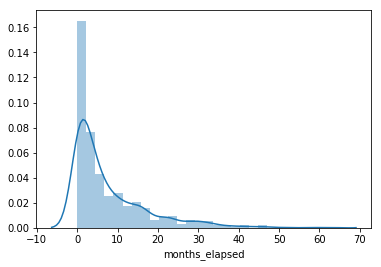

In [59]:
sns.distplot(df1[df1.cause!='grease'].months_elapsed)

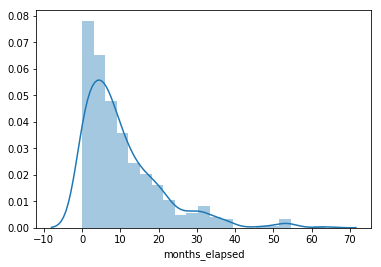

In [58]:
sns.distplot(df1[df1.cause=='grease'].months_elapsed)

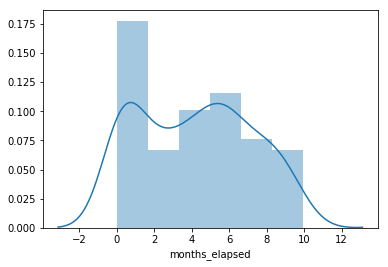

In [60]:
sns.distplot(df1[(df1.cause=='grease') & (df1.months_elapsed <= 10)].months_elapsed)

# EXPLORE

#### _Looking for the repeat offenders..._

In [22]:
df1.num_spills_24mos[df1.num_spills_24mos > 1].value_counts()

2    64
3    20
4     1
Name: num_spills_24mos, dtype: int64

#### _Locations of the most frequent SSOs in 2 years_

In [23]:
df1[['spill_street_address']][df1.num_spills_24mos >= 9]

Empty DataFrame
Columns: [spill_street_address]
Index: []

#### _Total number of gallons spilled by the most frequent SSOs in 2 years_

In [24]:
df1.total_gallons[df1.num_spills_24mos >= 9].agg('sum')

0

In [25]:
df1[['spill_street_address', 'total_gallons', 'hours', 'root_cause',
     'unit_type', 'asset_type', 'last_cleaned', 'multiple_spills',
     'discharge_to', 'discharge_route']][df1.num_spills_24mos >= 9]

Empty DataFrame
Columns: [spill_street_address, total_gallons, hours, root_cause, unit_type, asset_type, last_cleaned, multiple_spills, discharge_to, discharge_route]
Index: []

#### _Most common root causes of SSOs_

In [26]:
df1.root_cause.value_counts()

structural     585
grease         239
debris         122
rain event      38
rain event      26
contractor      25
other           23
vandalism       14
roots           13
vandalism        8
i/i              7
other            1
Name: root_cause, dtype: int64

- [ ] **TODO:** Find a way to flesh out the address using regex to account for typos etc.
- [ ] **TODO:** Maybe try using unit id's instead of addresses.
- [ ] **TODO:** Drill down to only the top 3-5 locations.
- [ ] **TODO:** Compare predictions between preventing SSO on the most frequents versus not preventing.
- [ ] **TODO:** What is causing the spills on these top 3-5 locations?

In [27]:
df1.head(4).T

965                  966                   968                   969
report_date           2015-05-07 00:00:00  2015-05-06 00:00:00   2015-05-02 00:00:00   2015-04-30 00:00:00
total_gallons                         251                   50                 21300                    70
gallons_returned                        0                    0                     0                     0
spill_start           5/7/2015 1:19:00 PM  5/6/2015 4:31:00 PM  5/1/2015 10:45:00 PM  4/30/2015 1:15:00 PM
spill_stop            5/7/2015 5:30:00 PM  5/6/2015 5:30:00 PM   5/2/2015 3:15:00 AM  4/30/2015 1:30:00 PM
hours                             4.18333             0.983333                   4.5                  0.25
cause                          structural               grease                grease            structural
actions                     repaired main         cleaned main          cleaned main          cleaned main
watershed                        dos rios             dos rios            leon creek              dos rios
unit_id_1                           45497                 4603                 69621                  3176
unit_id_2                           45498                24548                 80241                  3177
discharge_to                   stormdrain               street      drainage culvert            stormdrain
discharge_route                      none                 none                  none                  none
council_district                        2                    9                     4                     1
month                                   5                    5                     5                     4
year                                 2015                 2015                  2015                  2015
week                                   19                   19                    18                    18
edwards_zone                            0                    0                     0                     0
pipe_diameter                           8                    8                     8                     8
pipe_length                           160                  157                129.04                   245
pipe_type                              ct                   cp                   vcp                   vcp
installation_year                    1945                 1963                  1960                  1958
inches_no                               0                    0                     0                     0
rainfall_less_3                         0                    0                     0                  0.17
num_spills_compkey                      1                    1                     2                     1
num_spills_24mos                        1                    1                     1                     1
unit_type                         gravity              gravity               gravity               gravity
asset_type                     sewer main           sewer main            sewer main            sewer main
last_cleaned          2014-09-22 00:00:00  2013-10-12 00:00:00   2013-10-23 00:00:00   2013-10-17 00:00:00
response_time                        0.18                 0.48                  0.12                  0.00
response_datetime     2015-05-07 00:00:00  2015-05-06 00:00:00   2015-05-01 00:00:00   2015-04-30 00:00:00
public_notice                       False                False                 False                 False
time_int                               12                   24                   120                    24
root_cause                     structural           structural                grease            structural
steps_to_prevent         Design Request,      Design Request,         Increase FCS,       Design Request, 
spill_street_address  1306 Hackberry St N        9615 Plymouth     6203 Amberwood Dr    6435 San Pedro Ave
multiple_spills                     False                False                 

In [28]:
df1[['spill_street_address', 'unit_id_1','unit_id_2', 'unit_type', 'asset_type']].head(15)

spill_street_address unit_id_1 unit_id_2 unit_type  asset_type
965  1306 Hackberry St N     45497     45498   gravity  sewer main
966        9615 Plymouth      4603     24548   gravity  sewer main
968    6203 Amberwood Dr     69621     80241   gravity  sewer main
969   6435 San Pedro Ave      3176      3177   gravity  sewer main
972     7400 Loop 410 Nw    537958    537957   gravity  sewer main
973       200 Ira Lee Rd     60043     48128   outfall  sewer main
974     2630 Arbor Place     87496     87497   gravity  sewer main
975      5802 Kim Valley    544102     70014   gravity  sewer main
977       1074 Arion Cir     52815    931140   outfall  sewer main
978          726 Ruiz St     13702     14386   gravity  sewer main
979        1235 Lombrano     11989     13724   gravity  sewer main
980          111 Yolanda     34284     75662    siphon  sewer main
981         668 Holbrook    922726     47824   outfall  sewer main
983      409 Cheryl Dr E      6042      8224   outfall  sewer main
984     755 Avondale Ave     31744     46257   gravity  sewer main

- [ ] **TODO:** Maybe we can do some kind of clustering to group problem areas.

In [29]:
df1.unit_id_1.value_counts()[df1.unit_id_1.value_counts() > 7]

Series([], Name: unit_id_1, dtype: int64)

In [30]:
df1.unit_id_2.value_counts()[df1.unit_id_2.value_counts() > 7]

Series([], Name: unit_id_2, dtype: int64)

In [31]:
df1['root_cause'].value_counts()

structural     585
grease         239
debris         122
rain event      38
rain event      26
contractor      25
other           23
vandalism       14
roots           13
vandalism        8
i/i              7
other            1
Name: root_cause, dtype: int64

In [32]:
df1['spill_street_address'].value_counts()[df1.spill_street_address.value_counts() > 7]

Series([], Name: spill_street_address, dtype: int64)

#### _Looking for locations with most SSOs that are also caused by grease._

In [33]:
df1.columns

Index(['report_date', 'total_gallons', 'gallons_returned', 'spill_start', 'spill_stop', 'hours', 'cause', 'actions', 'watershed', 'unit_id_1', 'unit_id_2', 'discharge_to', 'discharge_route', 'council_district', 'month', 'year', 'week', 'edwards_zone', 'pipe_diameter', 'pipe_length', 'pipe_type', 'installation_year', 'inches_no', 'rainfall_less_3', 'num_spills_compkey', 'num_spills_24mos', 'unit_type', 'asset_type', 'last_cleaned', 'response_time', 'response_datetime', 'public_notice', 'time_int', 'root_cause', 'steps_to_prevent', 'spill_street_address', 'multiple_spills', 'months_elapsed'], dtype='object')

In [34]:
df1['counts'] = df1.root_cause
df1['counts'] = df1.groupby(['spill_street_address']).transform('count')
df1

report_date  total_gallons  gallons_returned             spill_start              spill_stop       hours                  cause                        actions          watershed unit_id_1 unit_id_2                             discharge_to            discharge_route  council_district  month  year  week  edwards_zone  pipe_diameter  pipe_length pipe_type  installation_year  inches_no  rainfall_less_3  num_spills_compkey  num_spills_24mos unit_type  asset_type last_cleaned response_time response_datetime  public_notice  time_int   root_cause    steps_to_prevent        spill_street_address  multiple_spills  months_elapsed  counts
965   2015-05-07            251               0.0     5/7/2015 1:19:00 PM     5/7/2015 5:30:00 PM    4.183333             structural                  repaired main           dos rios     45497     45498                               stormdrain                       none                 2      5  2015    19             0            8.0   160.000000        ct               1945       0.00             0.00                   1                 1   gravity  sewer main   2014-09-22          0.18        2015-05-07          False        12   structural    Design Request,          1306 Hackberry St N            False        7.458059       1
966   2015-05-06             50               0.0     5/6/2015 4:31:00 PM     5/6/2015 5:30:00 PM    0.983333                 grease                   cleaned main           dos rios      4603     24548                                   street                       none                 9      5  2015    19             0            8.0   157.000000        cp               1963       0.00             0.00                   1                 1   gravity  sewer main   2013-10-12          0.48        2015-05-06          False        24   structural    Design Request,                9615 Plymouth            False       18.760139       1
968   2015-05-02          21300               0.0    5/1/2015 10:45:00 PM     5/2/2015 3:15:00 AM    4.500000                 grease                   cleaned main         leon creek     69621     80241                         drainage culvert                       none                 4      5  2015    18             0            8.0   129.040000       vcp               1960       0.00             0.00                   2                 1   gravity  sewer main   2013-10-23          0.12        2015-05-01          False       120       grease      Increase FCS,            6203 Amberwood Dr            False       18.267316       1
969   2015-04-30             70               0.0    4/30/2015 1:15:00 PM    4/30/2015 1:30:00 PM    0.250000             structural                   cleaned main           dos rios      3176      3177                               stormdrain                       none                 1      4  2015    18             0            8.0   245.000000       vcp               1958       0.00             0.17                   1                 1   gravity  sewer main   2013-10-17          0.00        2015-04-30          False        24   structural    Design Request,           6435 San Pedro Ave             True       18.398735       1
972   2015-04-26          58650               0.0    4/26/2015 1:35:00 PM    4/27/2015 7:50:00 AM   18.250000                    i/i    diluted by heavy rain water         leon creek    537958    537957     creek bed -  spilled into leon creek                 leon creek                 6      4  2015    18             0            8.0   265.140000       pvc               2012       0.00             0.00                   1                 1   gravity  sewer main   2014-06-04          4.17        2015-04-26          False       120   rain event           I/I Inv,             7400 Loop 410 Nw            False       10.710692       1
973   2015-04-25           1010               0.0    4/25/2015 9:58:00 AM    4/25/2015 1:20:00 PM    3.366667                    i/i    diluted by heavy rain water       s

#### _Below shows the most frequent SSOs that are caused by grease._

In [35]:
df1.loc[(df1['counts'] >= 7) & (df1['root_cause'] == 'grease')]

Empty DataFrame
Columns: [report_date, total_gallons, gallons_returned, spill_start, spill_stop, hours, cause, actions, watershed, unit_id_1, unit_id_2, discharge_to, discharge_route, council_district, month, year, week, edwards_zone, pipe_diameter, pipe_length, pipe_type, installation_year, inches_no, rainfall_less_3, num_spills_compkey, num_spills_24mos, unit_type, asset_type, last_cleaned, response_time, response_datetime, public_notice, time_int, root_cause, steps_to_prevent, spill_street_address, multiple_spills, months_elapsed, counts]
Index: []

#### _Below shows the most devastating SSOs by volume._

In [36]:
df1[df1.total_gallons > 1500000]

Empty DataFrame
Columns: [report_date, total_gallons, gallons_returned, spill_start, spill_stop, hours, cause, actions, watershed, unit_id_1, unit_id_2, discharge_to, discharge_route, council_district, month, year, week, edwards_zone, pipe_diameter, pipe_length, pipe_type, installation_year, inches_no, rainfall_less_3, num_spills_compkey, num_spills_24mos, unit_type, asset_type, last_cleaned, response_time, response_datetime, public_notice, time_int, root_cause, steps_to_prevent, spill_street_address, multiple_spills, months_elapsed, counts]
Index: []

In [37]:
df1[df1.total_gallons > 1500000].shape

(0, 39)

In [38]:
df1.installation_year.value_counts().sort_index()

1899     1
1900     2
1906     6
1909     1
1912     1
1914     1
1915     2
1916     5
1918     4
1920     5
1921     1
1922     2
1923     3
1925     3
1926     2
1927    14
1928     8
1929     3
1930     1
1931     2
1934     1
1935     1
1937     1
1945    11
1946    25
1947     7
1948    42
1949    10
1950    25
1951     8
1952    17
1953    11
1954    12
1955    10
1956    16
1957    17
1958    19
1959    19
1960    18
1961    11
1962    19
1963    27
1964    23
1965    26
1966    22
1967    10
1968    19
1969     9
1970    16
1971    17
1972    24
1973    38
1974    22
1975     5
1976    16
1977    12
1978    23
1979    11
1980    14
1981     9
1982    14
1983    21
1984    16
1985    10
1986    15
1987    15
1988    17
1989    16
1990     7
1991     8
1992    12
1993     7
1994     5
1995     8
1996     6
1997     2
1998     3
1999    10
2000    14
2001     3
2002     9
2003    12
2004     3
2005    13
2006    16
2007     7
2008     8
2009     3
2010    22
2011    35
2012    40

#### _Spills by installation year._

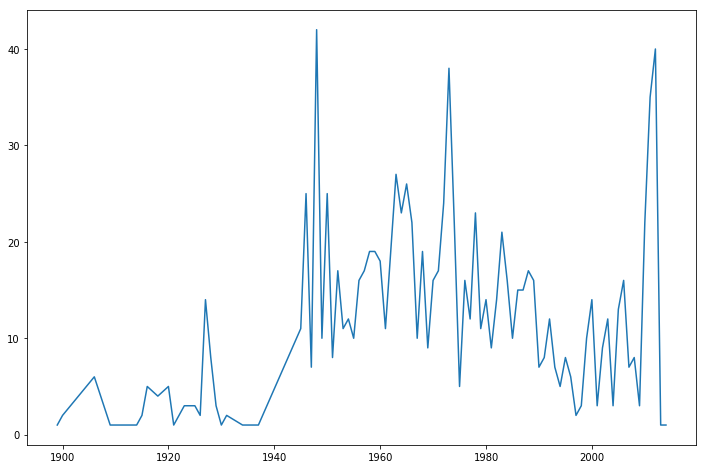

In [39]:
plt.figure(figsize=(12,8))
plt.plot(df1[df1.installation_year < 9999].groupby('installation_year')['spill_street_address'].count())

In [40]:
df1.year.value_counts().sort_index()

2009     75
2010    240
2011    202
2012    227
2013    162
2014    133
2015     62
Name: year, dtype: int64

#### _Spills by year._

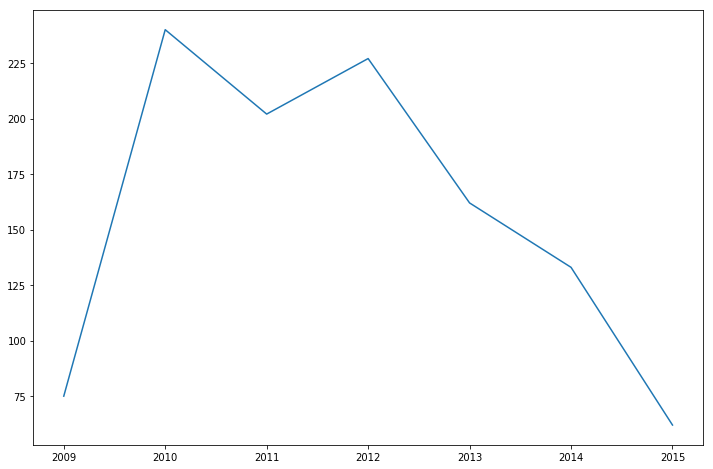

In [41]:
plt.figure(figsize=(12,8))
plt.plot(df1[df1.year < 2019].groupby('year')['spill_street_address'].count())

#### _All observations grouped by month of the year._

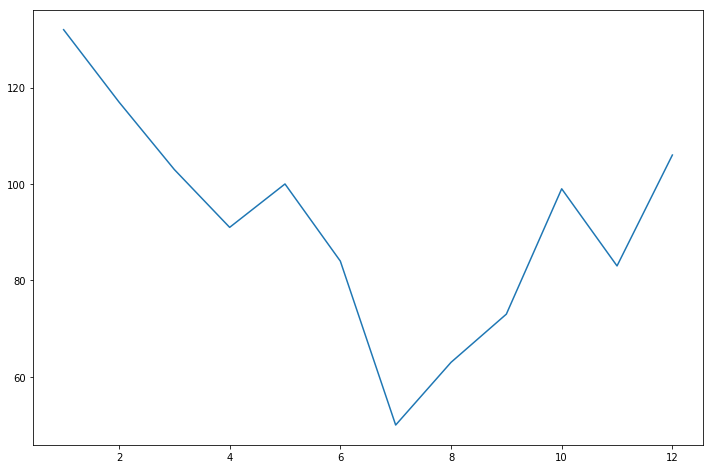

In [42]:
plt.figure(figsize=(12,8))
plt.plot(df1.groupby('month')['spill_street_address'].count())

#### _Colder months mean more grease clogs. Grease solidifies in colder temperatures._

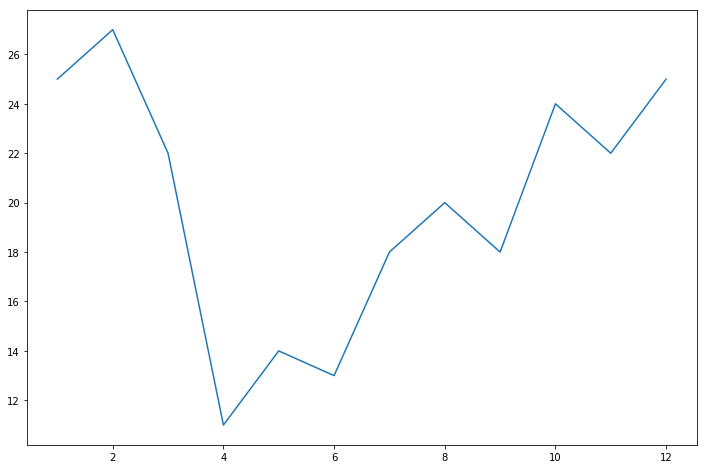

In [43]:
plt.figure(figsize=(12,8))
plt.plot(df1[(df1.root_cause == 'grease') & (df1.year < 2019)].groupby('month')['spill_street_address'].count())